<a href="https://colab.research.google.com/github/Revathi-Bejawada/RevathiINFO5502_Spring2022/blob/main/lab_assignment_04_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [162]:
#import libraries
import os
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import PlaintextCorpusReader
import nltk
#download the required
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

#1 How many categories in total?

path = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]")
print('The number of categories present are {}'.format(len(path)))





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
The number of categories present are 76


In [163]:

#2 How many documents under each category?

for r in path: #for loop
  documents = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]/{}".format((r)))
  print('In file {} we have {}  number of documents'.format(r,len(documents)))

In file 14 we have 277  number of documents
In file 47 we have 0  number of documents
In file 49 we have 0  number of documents
In file 2 we have 62  number of documents
In file 78 we have 0  number of documents
In file 25 we have 244  number of documents
In file 13 we have 468  number of documents
In file 40 we have 0  number of documents
In file 22 we have 284  number of documents
In file 5 we have 761  number of documents
In file 71 we have 0  number of documents
In file 12 we have 0  number of documents
In file 24 we have 0  number of documents
In file 77 we have 0  number of documents
In file 76 we have 0  number of documents
In file 3 we have 0  number of documents
In file 23 we have 0  number of documents
In file 15 we have 0  number of documents
In file 70 we have 0  number of documents
In file 4 we have 0  number of documents
In file 63 we have 0  number of documents
In file 54 we have 0  number of documents
In file 53 we have 0  number of documents
In file 30 we have 0  numbe

In [164]:
#3 What is the avergae number of sentence (on average)?

#import pandas
import pandas as pd
shape_sum = 0
for r in path:
    
    documents = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]/{}".format((r)))
    
    try:
        for file in documents:
            path = os.path.join("/content/gdrive/My Drive/preprocessed_cases[cases_29404]", r, file) #join and then read
            files = pd.read_csv(path, sep="\t")
            shape_sum += files.shape[0]
        
    except:
        print(r, file)
print("The average number of sentences in all categories are:", round(shape_sum/78, 2))
print("The average number of sentences in all files is:", round(shape_sum/29404, 2))

The average number of sentences in all categories are: 1298.96
The average number of sentences in all files is: 3.45


In [172]:
#4 What is the average number of words (on average)?

#import the libraries
import pandas as pd
import nltk
#download and inmport the stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
shape_sum = 0
for folder in path:
    documents = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in documents:
            file_url = os.path.join("/content/gdrive/My Drive/preprocessed_cases[cases_29404]", folder, file)
            inputs = pd.read_csv(file_url, sep="\t")
            for col in inputs.columns:
                inputs[col] = inputs[col].apply(lambda x: [item for item in x.split() if ((item not in stop_words) and (len(item)!= 1))])
                
                for sent in inputs[col]:
                    shape_sum += len(sent)
        
    except Exception as e:
        print(e)
print("The average no of words in all categories is:", round(shape_sum/78, 2))
print("The average no of words in all files is:", round(shape_sum/29404, 2))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
The average no of words in all categories is: 59711.71
The average no of words in all files is: 158.4


In [167]:
!pip install stop_words

In [169]:
#5 Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

import re
import pandas as pd
from stop_words import get_stop_words
from nltk.corpus import stopwords
import nltk
import nltk
import os
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

# set creation of stop words
p = set(stopwords.words('english'))
q = list(get_stop_words('en'))
# combine the two sets of stop words 
stopwords = list(set(list(p)) | set(list(q)))
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]
#print length of stop words
print(len(stopwords))

output = []
path = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]")
# we loop through each file and create a list of words
for folder in path:
    documents = os.listdir("/content/gdrive/My Drive/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in documents:
            filepath = os.path.join("/content/gdrive/My Drive/preprocessed_cases[cases_29404]", folder, file)
            
            inputs = pd.read_csv(filepath, sep="\t")
            for col in inputs.columns:
                inputs[col] = inputs[col].str.lower()
                inputs[col] = inputs[col].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))
                inputs[col] = inputs[col].apply(lambda x: " ".join(item for item in x.split() if ((item not in stopwords) and (len(item)!= 1))))
                
                for r in inputs[col]:
                    output.extend(r.split())
       
    except Exception as e:
        print(e)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
211


In [170]:
from collections import Counter
# we get the top 50 unique terms and their count
(Counter(output).most_common(50))

[('court', 72999),
 ('district', 29864),
 ('also', 16581),
 ('state', 15162),
 ('may', 14334),
 ('fees', 14049),
 ('whether', 13883),
 ('claim', 13663),
 ('law', 13574),
 ('attorney', 13104),
 ('trial', 12562),
 ('evidence', 12272),
 ('case', 12102),
 ('judgment', 12002),
 ('claims', 11950),
 ('must', 11427),
 ('action', 10743),
 ('states', 10679),
 ('first', 10585),
 ('one', 10519),
 ('public', 10512),
 ('section', 9789),
 ('plaintiff', 9575),
 ('order', 9395),
 ('new', 9341),
 ('federal', 9257),
 ('motion', 8954),
 ('united', 8952),
 ('act', 8490),
 ('government', 8487),
 ('city', 8483),
 ('plaintiffs', 8440),
 ('issue', 8194),
 ('party', 8184),
 ('statute', 7857),
 ('defendants', 7773),
 ('patent', 7760),
 ('use', 7725),
 ('defendant', 7705),
 ('two', 7510),
 ('time', 7339),
 ('filed', 7203),
 ('reasonable', 7121),
 ('rule', 7081),
 ('parties', 7044),
 ('review', 7011),
 ('decision', 6874),
 ('right', 6814),
 ('made', 6720),
 ('found', 6634)]

In [171]:
from collections import Counter
list_counters = (Counter(output).most_common(50))

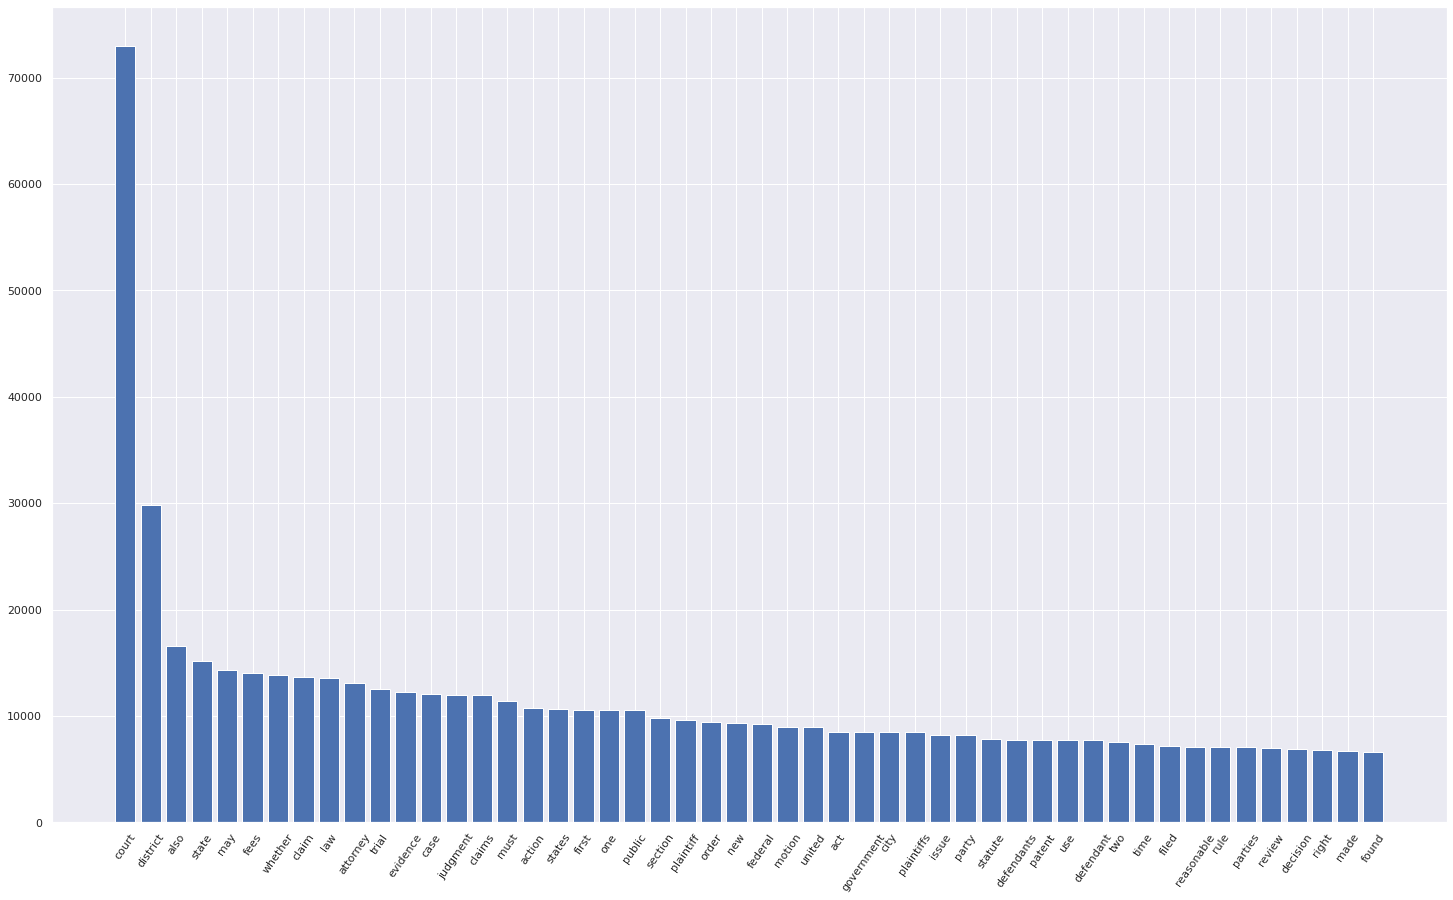

In [115]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc = {'figure.figsize':(25,15)})
plt.bar(dict(list_counters).keys(), dict(list_counters).values())
#the x-axis names are being overlapped so we are rotating them to 55
plt.xticks(rotation = 55) 
plt.show()

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:


In [118]:
# Your answer here (code + explanation):
# 1 Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 

import pandas as pd
#the inputs is given as a url from git 
inputs = 'https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab-assignment-04-student-performance.csv'
#reading the inputs
data_frame = pd.read_csv(inputs)

#Looping files to get the required details
for ver in data_frame.columns:
    print("Column is:",ver)
    print("Number of rows are:", data_frame[ver].shape[0])
    print("Number of unique values:", data_frame[ver].value_counts().shape[0])
    print(data_frame[ver].value_counts())
    print()






Column is: ge
Number of rows are: 131
Number of unique values: 2
M    72
F    59
Name: ge, dtype: int64

Column is: cst
Number of rows are: 131
Number of unique values: 5
OBC     57
G       44
ST      20
MOBC     6
SC       4
Name: cst, dtype: int64

Column is: tnp
Number of rows are: 131
Number of unique values: 4
Good    59
Vg      38
Pass    25
Best     9
Name: tnp, dtype: int64

Column is: twp
Number of rows are: 131
Number of unique values: 4
Good    65
Vg      44
Pass    17
Best     5
Name: twp, dtype: int64

Column is: iap
Number of rows are: 131
Number of unique values: 4
Vg      63
Good    53
Best     8
Pass     7
Name: iap, dtype: int64

Column is: esp
Number of rows are: 131
Number of unique values: 4
Good    54
Vg      42
Pass    27
Best     8
Name: esp, dtype: int64

Column is: arr
Number of rows are: 131
Number of unique values: 2
N    78
Y    53
Name: arr, dtype: int64

Column is: ms
Number of rows are: 131
Number of unique values: 1
Unmarried    131
Name: ms, dtype: int

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


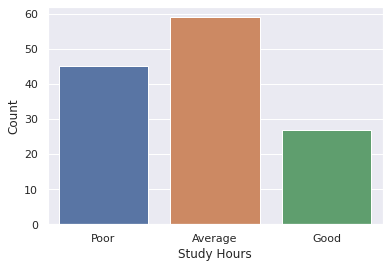

In [119]:
# 2 Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

#import seaborn libraries which are used for plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(data_frame['sh']) #we are using countplot 
plt.xlabel("Study Hours")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


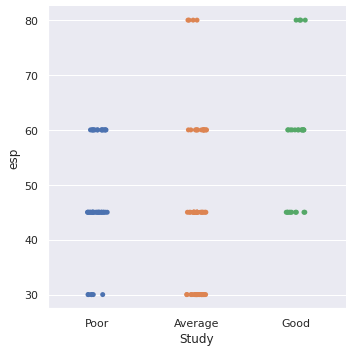

In [120]:
# 3.)
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
data_frame1 = pd.DataFrame()
data_frame1['Study']=pd.DataFrame(data_frame.sh) 
data_frame1['esp']=pd.DataFrame(data_frame.esp)
#format the values
data_frame1['esp'].mask(data_frame1['esp'] == 'Best', 80, inplace=True)
data_frame1['esp'].mask(data_frame1['esp'] == 'Vg', 60, inplace=True)
data_frame1['esp'].mask(data_frame1['esp'] == 'Good', 45, inplace=True)
data_frame1['esp'].mask(data_frame1['esp'] == 'Pass', 30, inplace=True)
data_frame1['esp'].mask(data_frame1['esp'] == 'Fail', 30, inplace=True)
data_frame1['exampercent']=pd.DataFrame(data_frame.esp)
#we are using factorplot
sns.factorplot(x='Study',y='esp', kind = 'strip',data=data_frame1)
#display the plot
plt.show()

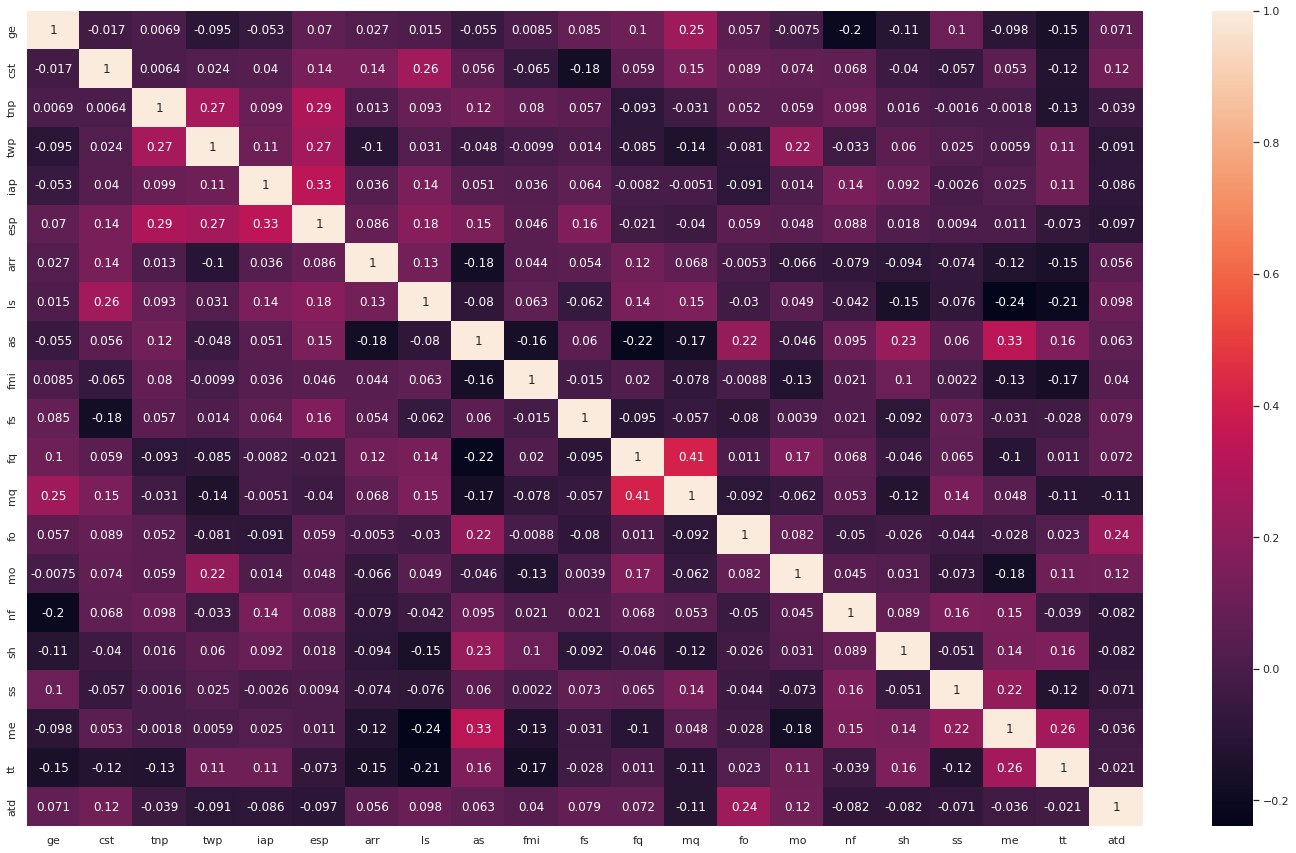

In [121]:
# 4
# Import the preprocessing 
from sklearn import preprocessing
import seaborn as sns
encoder_label = preprocessing.LabelEncoder()  
def Encoder(data_frame):
    columns_to_Encode = list(data_frame.select_dtypes(include=['category','object']))
    r = preprocessing.LabelEncoder()
    #we are transforming the data in the columns to the numeric data
    for feature in columns_to_Encode:
        try:
            data_frame[feature] = r.fit_transform(data_frame[feature]) #transformation
        except:
            print('Error encoding '+feature)
    return data_frame

data_frame1 = Encoder(data_frame)
data_frame1 = data_frame1.drop('ms', axis = 1) #dropping of ms columns

correlation_data = data_frame1.corr() #correlated data
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(correlation_data,annot=True)
plt.show()

Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [ ]:
# Your three questions:

'''
Please list your questions here:

I have taken the IPL dataset and here is what I want to know by conducting EDA Analysis

1. I want to know the which toss players had selcted when they won the toss
2. In which seasons they have selected the batting or fielding
3. what is win percentage of teams batting second.ed second


'''

'\nPlease list your questions here:\n\n\n\n\n\n'

In [122]:
# You code to answer the three questions (Please add comments in the code):
#import the required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# read the inputs
matches_input = pd.read_csv("matches.csv") 
scores_inputs = pd.read_csv("deliveries.csv")

#just to check the input format display the head
matches_input.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


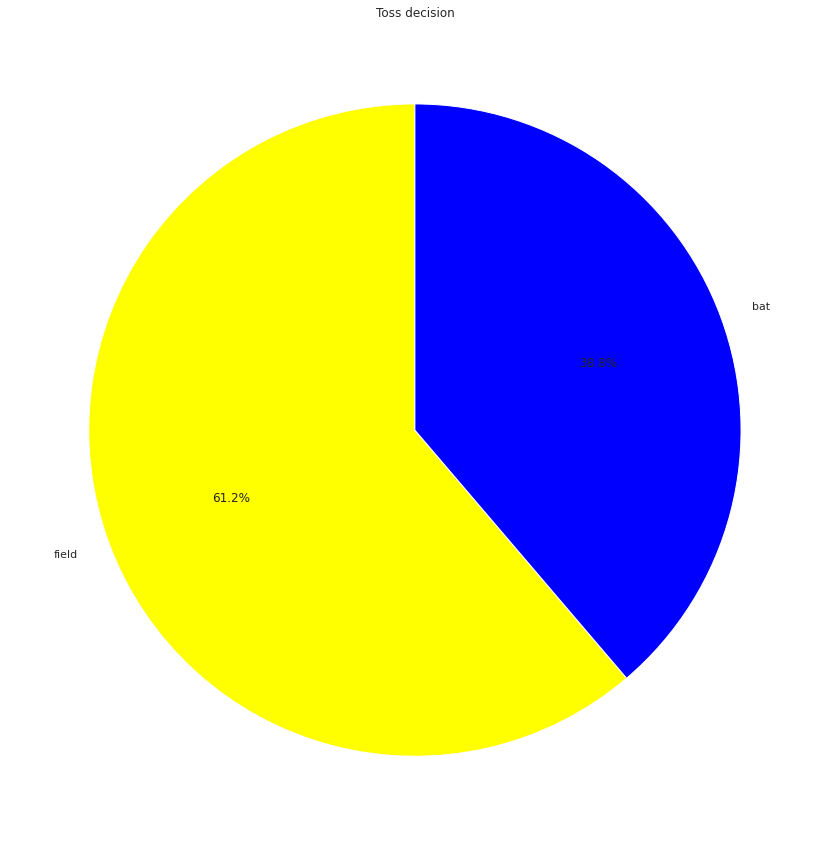

In [147]:
#1. To know the which toss players had selcted when they won the toss

series = matches_input.toss_decision.value_counts()
name = (np.array(series.index))
r = (np.array((series / series.sum())*100))
#assign the colours
colors = ['yellow', 'blue']
#plotting the pie chart
plt.pie(r, labels=name, colors=colors,
        autopct='%1.1f%%', startangle=90)
#give the title
plt.title("Toss decision")
plt.show()


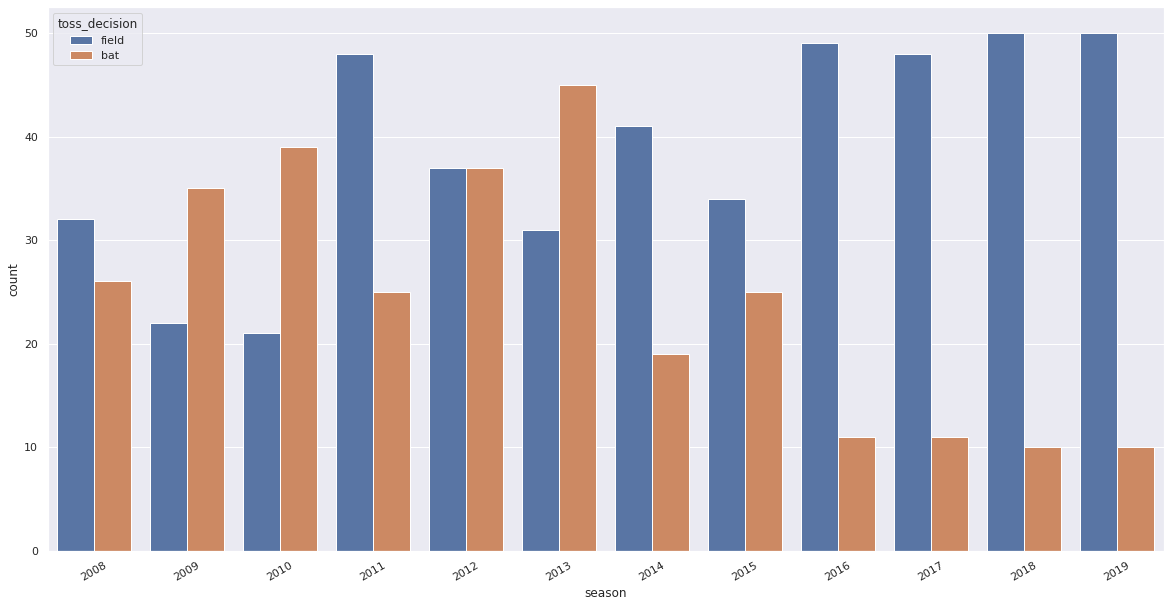

In [152]:
#2. In which seasons they have selected the batting or fielding

plt.figure(figsize=(20,10)) #give the parameters of size of the plot
sns.countplot(x='season', hue='toss_decision', data=matches_input) # we are taking the countplot here
plt.xticks(rotation= 30) #rotate so that names won't overlap
plt.show() #display the plot 

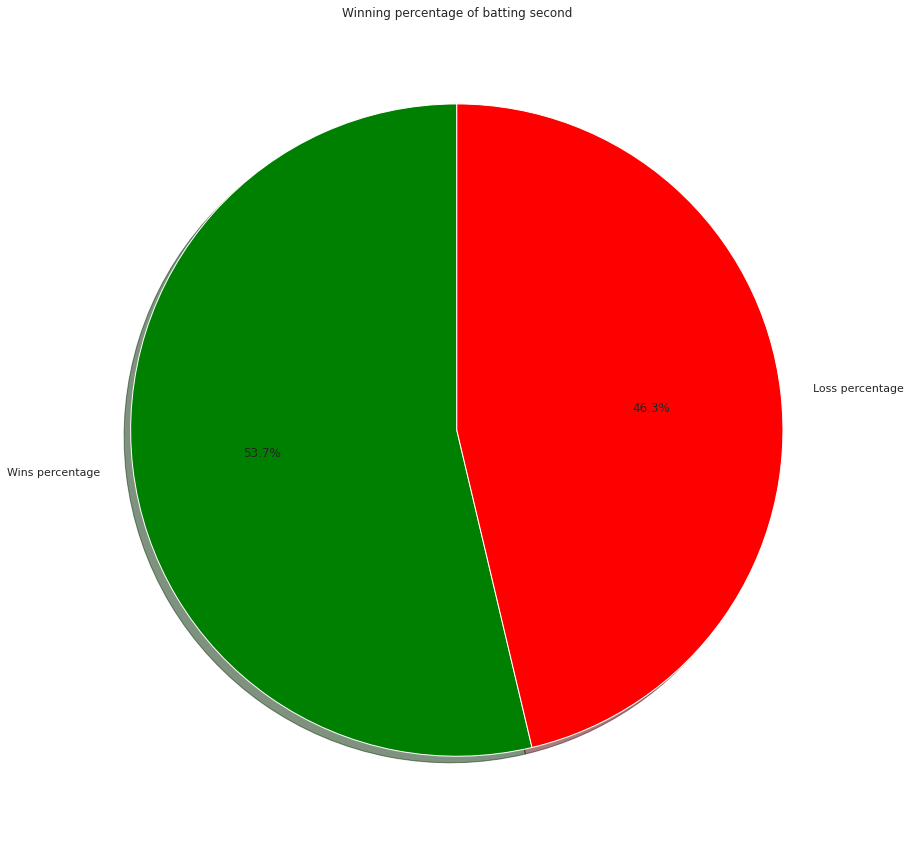

In [126]:
# what is win percentage of teams batting second.win percentage of teams batting second.

toos_wins = (matches_input.win_by_wickets>0).sum()
toos_loss = (matches_input.win_by_wickets==0).sum()
name = ["Wins percentage", "Loss percentage"] #giving the labels to the chart

total = float(toos_wins + toos_loss) # calculating the total to know the outputs

sizes = [(toos_wins/total)*100, (toos_loss/total)*100] #divide and calcuate

colors = ['green', 'red'] #assigning colors to the chart

plt.pie(sizes, labels=name, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Winning percentage of batting second")
plt.show() #plotting